<a href="https://colab.research.google.com/github/Anisha-Tasneem/Phishing-Email-Detection/blob/main/Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess & Model Train

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import psutil
import time
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Measure CPU and RAM usage before any processing
cpu_before = psutil.cpu_percent()
ram_before = psutil.virtual_memory().used / (1024 ** 3)  # Convert to GB

# Load data
start_time_data_loading = time.time()
df = pd.read_csv('/content/drive/MyDrive/CSE445/Phishing_Email.csv')
end_time_data_loading = time.time()

# Manually define a small set of common English stopwords
manual_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
    "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
    'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
    'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
    'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no',
    'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
    'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't",
    'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
    'won', "won't", 'wouldn', "wouldn't"
])

# Preprocessing the email text
def preprocess_text(text):
    # Convert non-string entries to an empty string
    if not isinstance(text, str):
        text = ''
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply the preprocessing to the Email Text column
df['Email Text'] = df['Email Text'].apply(preprocess_text)

# Data Cleaning and Preparation
start_time_preprocessing = time.time()
# Check for missing values
df.isnull().sum()

# Drop rows with missing values
df.dropna(inplace=True)

# Convert text data into numerical format using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Email Text'])

# Encode the Email Type (target variable)
# Assuming 'Email Type' contains categorical values like 'phishing' and 'non-phishing'
y = df['Email Type'].factorize()[0]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
end_time_preprocessing = time.time()

# Train the Decision Tree model
start_time_training = time.time()
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
end_time_training = time.time()

# Make predictions and evaluate the model
start_time_evaluation = time.time()
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
end_time_evaluation = time.time()

# Measure CPU and RAM usage after training
cpu_after = psutil.cpu_percent()
ram_after = psutil.virtual_memory().used / (1024 ** 3)  # Convert to GB

# Print resource usage and other metrics
print(f'CPU usage before training: {cpu_before}%')
print(f'RAM usage before training: {ram_before:.2f} GB')
print(f'CPU usage after training: {cpu_after}%')
print(f'RAM usage after training: {ram_after:.2f} GB')
print(f'Total data loading time: {end_time_data_loading - start_time_data_loading:.2f} seconds')
print(f'Total preprocessing time: {end_time_preprocessing - start_time_preprocessing:.2f} seconds')
print(f'Total training time: {end_time_training - start_time_training:.2f} seconds')
print(f'Total evaluation time: {end_time_evaluation - start_time_evaluation:.2f} seconds')
print(f'Overall runtime: {end_time_evaluation - start_time_data_loading:.2f} seconds')
print(f'Accuracy: {accuracy}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CPU usage before training: 19.0%
RAM usage before training: 1.17 GB
CPU usage after training: 89.5%
RAM usage after training: 1.24 GB
Total data loading time: 0.95 seconds
Total preprocessing time: 6.41 seconds
Total training time: 32.39 seconds
Total evaluation time: 0.04 seconds
Overall runtime: 44.74 seconds
Accuracy: 0.9152815013404826


# Hyper-parameter space exploration

In [4]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

# Evaluate the best model on the test set
best_clf_random = random_search.best_estimator_
y_pred_random = best_clf_random.predict(X_test)
test_accuracy_random = accuracy_score(y_test, y_pred_random)

print(f'Best Hyperparameters (RandomizedSearchCV): {best_params_random}')
print(f'Best Cross-Validation Accuracy (RandomizedSearchCV): {best_score_random}')
print(f'Test Accuracy (RandomizedSearchCV): {test_accuracy_random}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters (RandomizedSearchCV): {'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Best Cross-Validation Accuracy (RandomizedSearchCV): 0.9073056300268096
Test Accuracy (RandomizedSearchCV): 0.9077747989276139


# Learning Curve

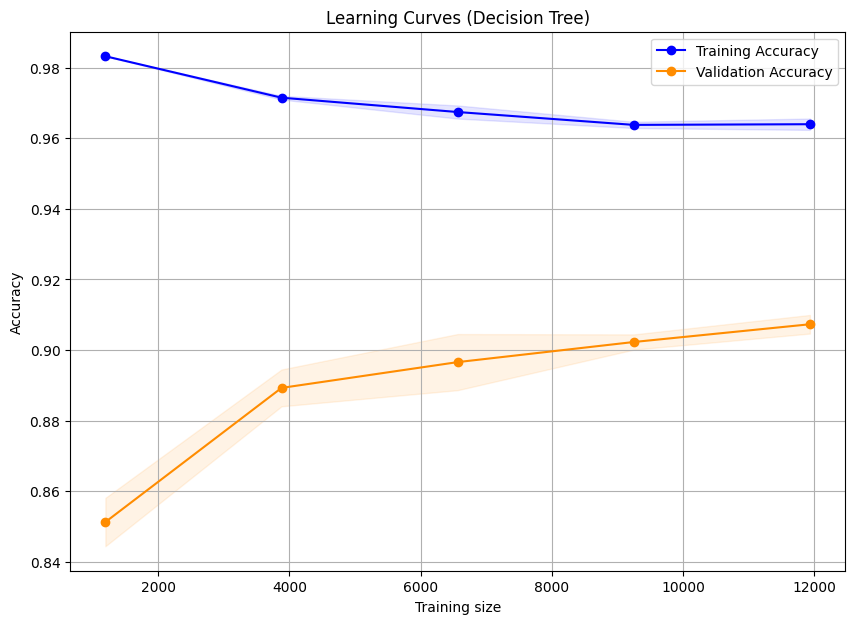

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 7))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training size")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="blue")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="darkorange")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue",
             label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="darkorange",
             label="Validation Accuracy")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves (Decision Tree)"
estimator = best_clf_random  # Use the best model obtained from RandomizedSearchCV
plot_learning_curve(estimator, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()

# Effects of the regularizers

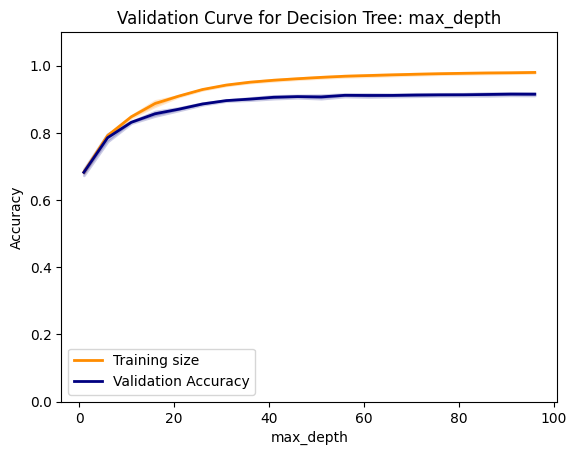

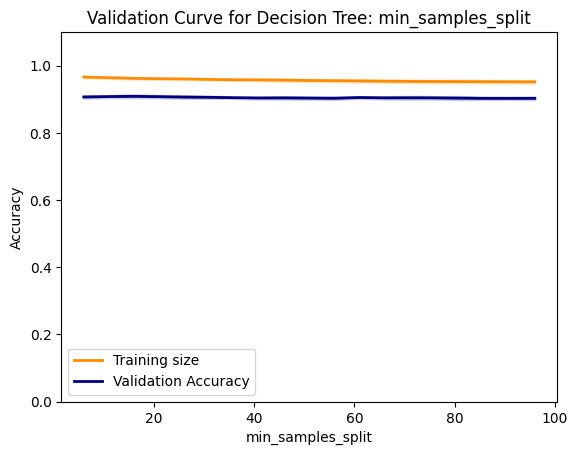

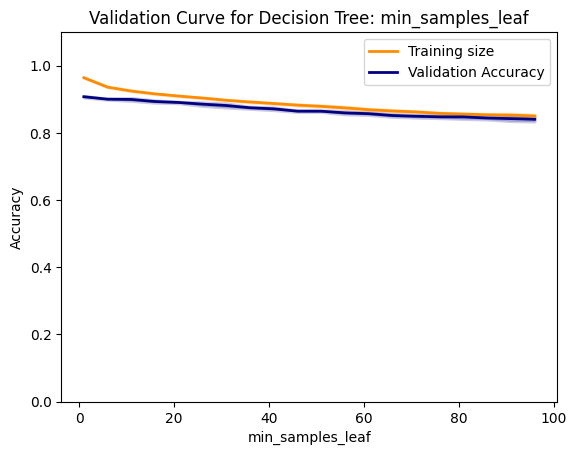

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Define the range of values for the regularizer you want to explore
param_range = np.arange(1, 101, 5)

# Define a function to plot validation curve
def plot_validation_curve(estimator, X, y, param_name, param_range, title):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=5, scoring="accuracy", n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training size",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Validation Accuracy",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

# Plot validation curve for max_depth
title = "Validation Curve for Decision Tree: max_depth"
plot_validation_curve(best_clf_random, X_train, y_train, param_name="max_depth", param_range=param_range, title=title)
plt.show()

# Plot validation curve for min_samples_split
title = "Validation Curve for Decision Tree: min_samples_split"
plot_validation_curve(best_clf_random, X_train, y_train, param_name="min_samples_split", param_range=param_range, title=title)
plt.show()

# Plot validation curve for min_samples_leaf
title = "Validation Curve for Decision Tree: min_samples_leaf"
plot_validation_curve(best_clf_random, X_train, y_train, param_name="min_samples_leaf", param_range=param_range, title=title)
plt.show()

# Metrics

In [7]:
from sklearn.metrics import classification_report

# Classification report
print(classification_report(y_test, y_pred, target_names=['Safe Email', 'Phishing Email']))

                precision    recall  f1-score   support

    Safe Email       0.95      0.91      0.93      2273
Phishing Email       0.87      0.92      0.89      1457

      accuracy                           0.92      3730
     macro avg       0.91      0.92      0.91      3730
  weighted avg       0.92      0.92      0.92      3730



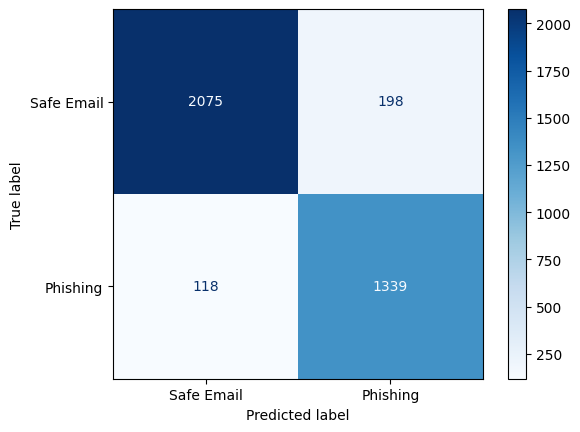

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from previous steps
# y_test: True labels of the test set
# y_pred: Predicted labels from the Decision Tree model

# Step: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Safe Email', 'Phishing'])
disp.plot(cmap=plt.cm.Blues)

# Display the plot
plt.show()

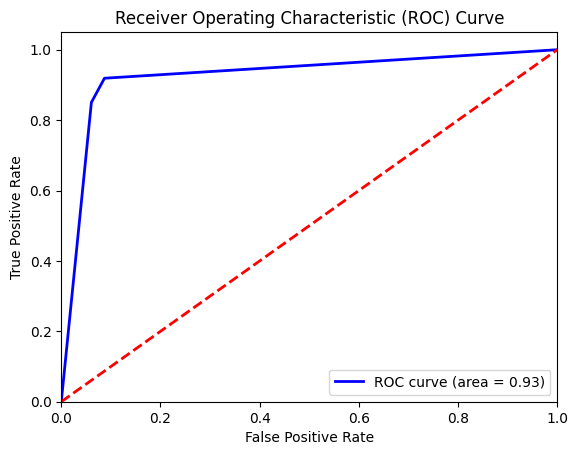

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Data cleaning
df.dropna(inplace=True)

# Text vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Email Text'])

# Encode the Email Type
y = df['Email Type'].factorize()[0]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

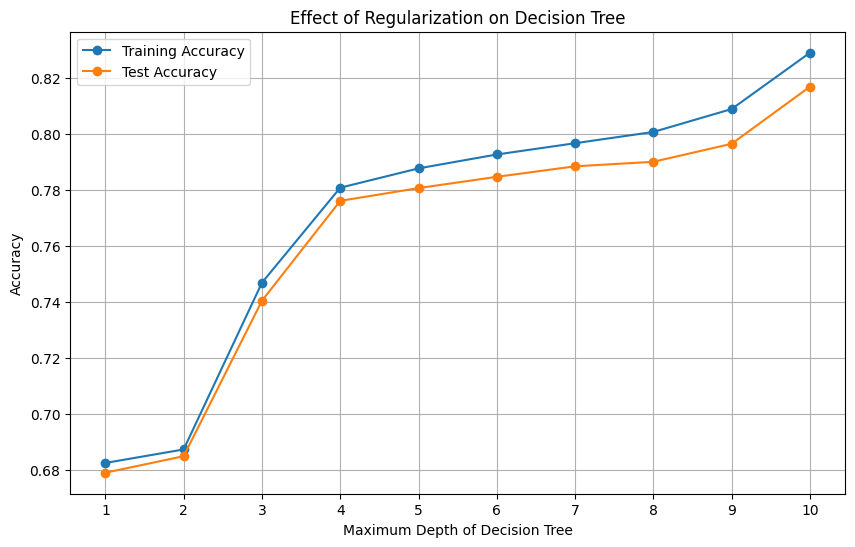

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Data cleaning
df.dropna(inplace=True)

# Text vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Email Text'])

# Encode the Email Type
y = df['Email Type'].factorize()[0]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of maximum depths to test
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

train_scores = []
test_scores = []

# Train Decision Tree models with different maximum depths
for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Predictions
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    # Compute accuracy scores
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, '-o', label='Training Accuracy')
plt.plot(max_depths, test_scores, '-o', label='Test Accuracy')
plt.xlabel('Maximum Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization on Decision Tree')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()

# CPU RAM

In [12]:
import psutil

# Get CPU usage
cpu_usage = psutil.cpu_percent()
print(f'CPU Usage: {cpu_usage}%')

# Get memory usage
memory_info = psutil.virtual_memory()
print(f'Total Memory: {memory_info.total} bytes')
print(f'Used Memory: {memory_info.used} bytes')
print(f'Free Memory: {memory_info.available} bytes')

# Get GPU information (if available)
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

CPU Usage: 75.4%
Total Memory: 13609435136 bytes
Used Memory: 2140778496 bytes
Free Memory: 11159977984 bytes


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7412952462053947641
 xla_global_id: -1]